### 标量

In [2]:
import torch
x = torch.tensor(3.0)
y = torch.tensor(2.0)

In [3]:
x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

### 向量
标量值组成的列表，标量就是向量的元素或者分量，向量通常用粗体表示   
向量的长度通常为向量的维度，x.shape()访问长度     
标量的获取为.item()

In [4]:
x = torch.arange(4)
x

tensor([0, 1, 2, 3])

In [6]:
x[3].item()

3

### 矩阵

In [4]:
A = torch.arange(20).reshape(5, 4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [5]:
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

### 张量
任意数量轴的n维度数组

In [10]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone() # 通过分配新内存，将A的⼀个副本分配给B
A, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]), tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [11]:
#点积
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [12]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]), torch.Size([2, 3, 4]))

### 降维
1. 求和的方法
2. 保持轴数不变的求和

In [13]:
x = torch.arange(4, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

In [16]:
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [14]:
A.shape, A.sum()

(torch.Size([5, 4]), tensor(190.))

In [15]:
A_sum_axis0 = A.sum(axis=0)
A_sum_axis0, A_sum_axis0.shape

(tensor([40., 45., 50., 55.]), torch.Size([4]))

In [17]:
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape

(tensor([ 6., 22., 38., 54., 70.]), torch.Size([5]))

In [18]:
A.sum(axis=[0, 1]) # 结果和A.sum()相同

tensor(190.)

In [20]:
A.sum()/A.numel()

tensor(9.5000)

In [21]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

In [22]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

In [23]:
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [26]:
# cumsum累计求和
A.cumsum(axis=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

### 点积Dot
按元素操作的乘积，并对求得的矩阵进行求和,x.dot(y)或者sum(x*y)     
点积作用比较大，权重的加权和

In [27]:
y = torch.ones(4, dtype = torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

### 矩阵-向量积
可以变换向量的维度，求解神经网络每一层需要的复杂计算，调用torch.mv(A,x)计算,A的列必须与x的维数相同

In [ ]:
A.shape, x.shape, torch.mv(A, x)

### 矩阵矩阵乘法
AB相乘，A的行向量和B的列向量相乘，调用torch.mm()

In [29]:
B = torch.ones(4, 3)
torch.mm(A, B)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

### 范数
向量的范数表示一个向量有多大，代表分量的大小，距离的度量。性质：非负性；按比例缩放；三角不等式    
- $L_2$的范式是向量元素平方和的平方根：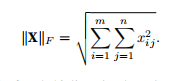    
调用函数torch.norm()
- $L_1$的范式是向量元素的绝对值之和：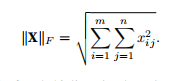
调用函数torch.abs(u).sum()     

范数用于深度学习优化的时候的惩罚项，防止优化过程中过拟合的现象

Frobenius范数，因为矩阵范数难度大，所以基本用此范数代替矩阵范数，矩阵元素平⽅和的平⽅根
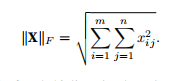

In [30]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [31]:
torch.abs(u).sum()

tensor(7.)

### 练习
1. 证明⼀个矩阵A的转置的转置是A，即(A
⊤)
⊤ = A。
2. 给出两个矩阵A和B，证明“它们转置的和”等于“它们和的转置”，即A
⊤ + B
⊤ = (A + B)
⊤。
3. 给定任意⽅阵A，A + A
⊤总是对称的吗?为什么?
4. 本节中定义了形状(2, 3, 4)的张量X。len(X)的输出结果是什么？
5. 对于任意形状的张量X,len(X)是否总是对应于X特定轴的⻓度?这个轴是什么?
6. 运⾏A/A.sum(axis=1)，看看会发⽣什么。请分析⼀下原因？
7. 考虑⼀个具有形状(2, 3, 4)的张量，在轴0、1、2上的求和输出是什么形状?
8. 为linalg.norm函数提供3个或更多轴的张量，并观察其输出。对于任意形状的张量这个函数计算得到
什么?

1. 证明⼀个矩阵A的转置的转置是A，即(A
⊤)⊤ = A。

In [11]:
#证明⼀个矩阵A的转置的转置是A，即(A ⊤) ⊤ = A。
A = torch.arange(20).reshape(5, 4)
B = (A.T).T
(A==B).all().item()

True

2. 给出两个矩阵A和B，证明“它们转置的和”等于“它们和的转置”，即A
⊤ + B
⊤ = (A + B)
⊤。

In [15]:
A = torch.arange(20).reshape(5, 4)
B = torch.randn(5,4)
((A.T+B.T)==(A+B).T).all().item()

True

3. 给定任意⽅阵A，A + A⊤总是对称的吗?为什么?    
**对称矩阵的判断为 A==A.T**

In [19]:
A = torch.randn(4,4)
B = A+ A.T
(B==B.T).all().item()

True

4. 本节中定义了形状(2, 3, 4)的张量X.len(X)的输出结果是什么？      
**输出结果为axis=0方向上的值**

In [21]:
A = torch.arange(24, dtype=torch.float32).reshape(2,3,4)
len(A)

2

5. 对于任意形状的张量X,len(X)是否总是对应于X特定轴的⻓度?这个轴是什么?     
  **是的，总对应axis=0的轴**

6. 运⾏A/A.sum(axis=1)，看看会发⽣什么。请分析⼀下原因？      
无法相除，因为其矩阵的shape不同了，而且无法进行广播,若在sum处加入keepdims=True就能够相除

In [29]:
A = torch.arange(20).reshape(5, 4)
A/A.sum(axis=1,keepdims=True)

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]])

 7. 考虑⼀个具有形状(2, 3, 4)的张量，在轴0、1、2上的求和输出是什么形状?

In [31]:
A = torch.arange(24).reshape(2,3,4)
print(A.sum(axis=0).shape)
print(A.sum(axis=1).shape)
print(A.sum(axis=2).shape)

torch.Size([3, 4])
torch.Size([2, 4])
torch.Size([2, 3])


8. 为linalg.norm函数提供3个或更多轴的张量，并观察其输出。对于任意形状的张量这个函数计算得到什么?      
**注意： A.sum()是求元素总和。 sum(A)是根据aixs=0的轴进行求和**

In [53]:
import numpy as np
A = torch.arange(48,dtype=torch.float32).reshape(2,3,4,2)
B = np.sqrt((A**2).sum()).item()
n = np.linalg.norm(A)
m = torch.norm(A)
B==n, m==n

(True, tensor(True))